In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [375]:
df = pd.read_csv("supermarket_sales.csv")

In [376]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,NaN,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,NaN,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,NaN,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Performing EDA

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     973 non-null    object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     887 non-null    object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [378]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,NaN,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,NaN,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,NaN,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [379]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [380]:
df.shape

(1000, 17)

In [381]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,995.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.974372
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.720616
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


In [382]:
df.isnull().sum()

Invoice ID                   0
Branch                       0
City                        27
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                       113
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       5
dtype: int64

In [383]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [384]:
df.drop(['Invoice ID','Time','Branch'],axis=1,inplace=True)

In [385]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,NaN,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,Ewallet,522.83,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,Cash,76.40,4.761905,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,Credit card,324.31,4.761905,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4
4,NaN,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet,40.35,4.761905,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,Ewallet,973.80,4.761905,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,Cash,31.84,4.761905,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Cash,65.82,4.761905,3.2910,4.1


In [386]:
df['gross margin percentage'].unique()

array([4.76190476])

In [387]:
df.drop(['gross margin percentage'],axis=1,inplace=True)

In [388]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,NaN,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,Ewallet,522.83,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,Cash,76.40,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,Credit card,324.31,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4
4,NaN,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet,40.35,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,Ewallet,973.80,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,Cash,31.84,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Cash,65.82,3.2910,4.1


In [389]:
df['City'].unique()

array([nan, 'Naypyitaw', 'Yangon', 'Mandalay'], dtype=object)

In [390]:
city_counts = df['City'].value_counts()

In [391]:
city_counts

City
Yangon       328
Mandalay     327
Naypyitaw    318
Name: count, dtype: int64

In [392]:
most_frequent_city = city_counts.idxmax()

In [393]:
most_frequent_city

'Yangon'

In [394]:
df['City'].fillna(most_frequent_city,inplace=True)

In [395]:
df['City'].isnull().sum()

0

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           1000 non-null   object 
 1   Customer type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product line   1000 non-null   object 
 4   Unit price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Tax 5%         1000 non-null   float64
 7   Total          1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Payment        1000 non-null   object 
 10  cogs           1000 non-null   float64
 11  gross income   1000 non-null   float64
 12  Rating         995 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 101.7+ KB


In [397]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())


In [398]:
df['Rating'].isnull().sum()

0

In [399]:
df.isnull().sum()

City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

In [400]:
df.shape

(1000, 13)

In [401]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,Ewallet,522.83,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,Cash,76.40,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,Credit card,324.31,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet,40.35,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,Ewallet,973.80,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,Cash,31.84,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Cash,65.82,3.2910,4.1


# Data Visualization

In [402]:
print(df.shape)
df['Gender'].value_counts()

(1000, 13)


Gender
Female    501
Male      499
Name: count, dtype: int64

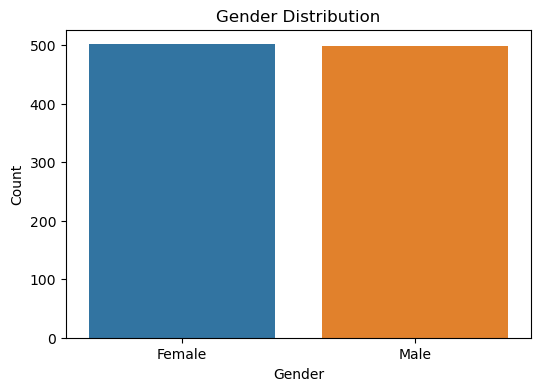

In [403]:
#Gender Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**The above bar graph shows the gender distribution of Male & female in the given data. This data shows the higher number of female and lower number of male.**

In [404]:
# How much total business done by male and female?

total_business = df.groupby('Gender')[['Total']].sum()
total_business

,Total
Gender,
Female,167882.925
Male,155083.824


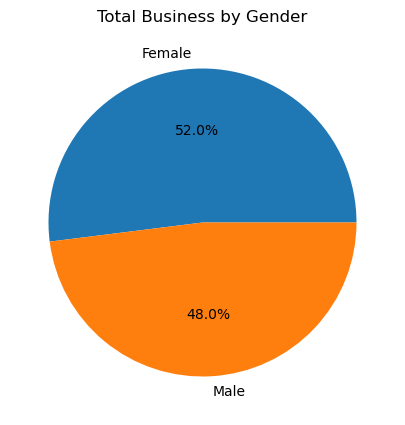

In [405]:
plt.figure(figsize=(10,5))
plt.pie(total_business['Total'], labels=total_business.index, autopct='%1.1f%%')
plt.title('Total Business by Gender')
plt.show()

**The above Pie Chart shows the business participation on the basis of Gender. The pie chart concludes that
maximum business are done by females.**

**Average Income per City**

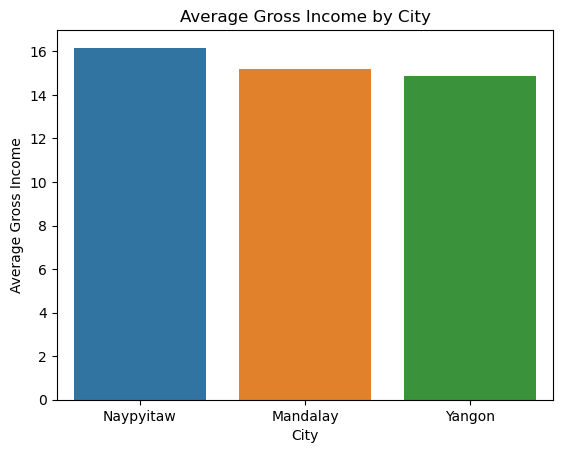

In [406]:
#Average Gross Income by City

avg_gross_income = df.groupby('City')['gross income'].mean().sort_values(ascending=False)
sns.barplot(x=avg_gross_income.index, y=avg_gross_income.values)
plt.title('Average Gross Income by City')
plt.xlabel('City')
plt.ylabel('Average Gross Income')
plt.show()

**Above bar graph shows the data of Average income by City, Naypyitaw has the highest Gross Income.**

**Payment Method**

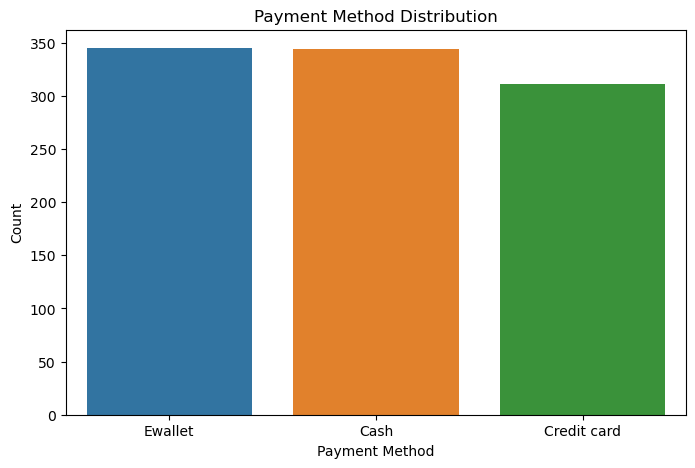

In [407]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Payment', data=df)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

**The above Bar graph shows the data of Payment Method Distribution. Maximum Payments are done by e-wallet.**

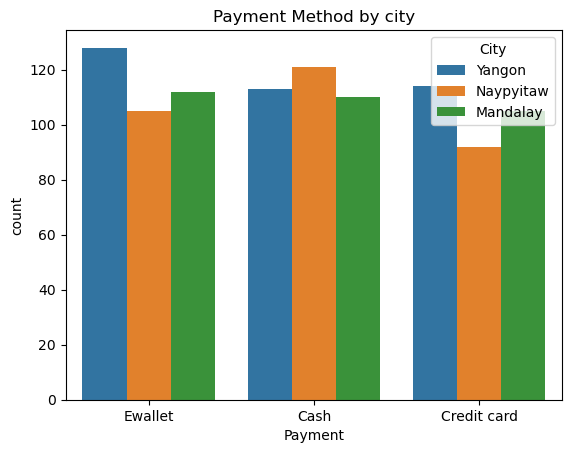

In [408]:
 sns.countplot(x="Payment", hue = "City", data =df).set_title("Payment Method by city") 
plt.show()

**Above bar graph shows citywise mode of payment, Maximum paymensts have been done through Ewallet.**

<Axes: xlabel='Product line', ylabel='gross income'>

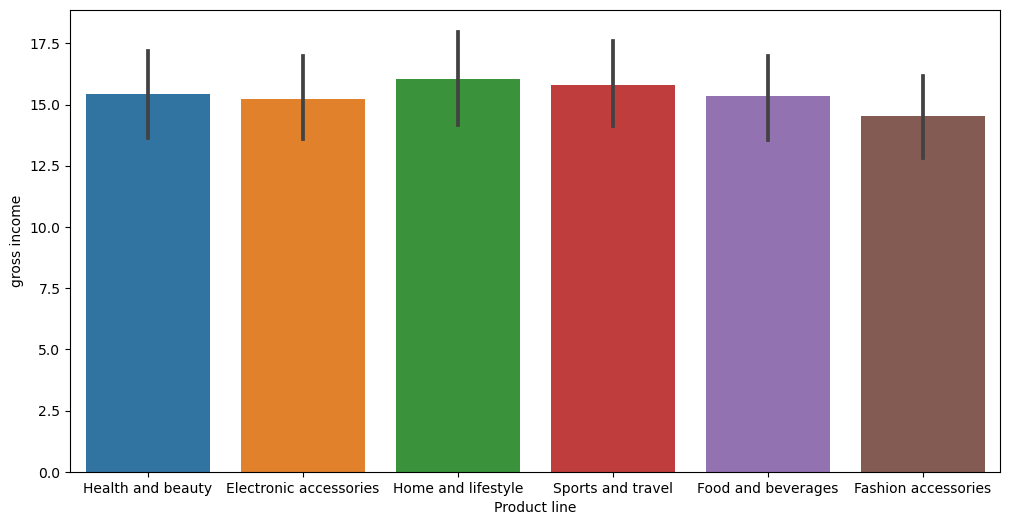

In [409]:
# Getting Gross Income Plot for each product line

plt.figure(figsize= (12,6))
sns.barplot(x = df['Product line'], y = df['gross income'])

**Above barplot reflects the gross income of various Product Lines, Home and lifestyle products have Highest Gross income.**

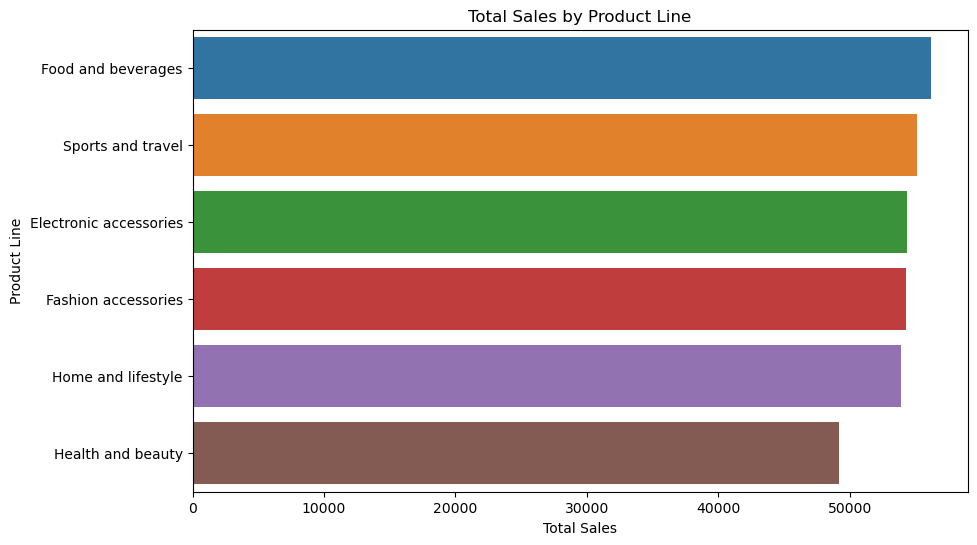

In [410]:
plt.figure(figsize=(10, 6))
total_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
sns.barplot(y=total_sales.index, x=total_sales.values)
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

**Above barplot shows Productwise Total Sales, Food & Beverages tops the graph.**

In [411]:
# What is the Average Rating for each product line

avg_rating = df.groupby("Product line")[['Rating']].mean().sort_values(by='Rating',ascending=False)
avg_rating

,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.005752
Sports and travel,6.931171
Electronic accessories,6.917783
Home and lifestyle,6.837500


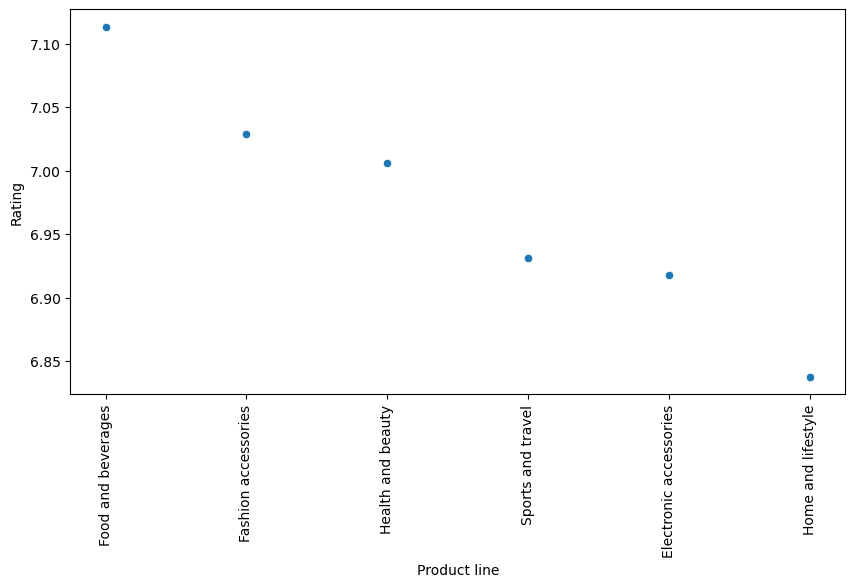

In [412]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Product line',y='Rating',data = avg_rating)
plt.xticks(rotation = "vertical")
plt.show()

**The above scatterplot reflects rating of the products, Food & Beverages has the best rating.**

In [413]:
# Which product line has the highest average unit price?

avg_unit_price = df.groupby('Product line')['Unit price'].mean()
avg_unit_price 

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

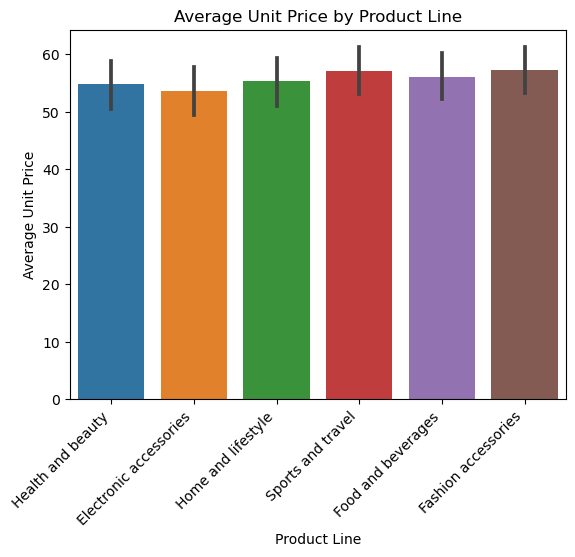

In [414]:
sns.barplot(x='Product line', y='Unit price', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Average Unit Price by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Unit Price')
plt.show()

**Above barplot shows the average unit price of product lines in which Fashion Acessories has the Highest Averge Unit Price.**

In [415]:
# What is the total tax amount collected for each city?

tax = df.groupby('City')['Tax 5%'].sum()
tax

City
Mandalay     4965.1665
Naypyitaw    5140.6185
Yangon       5273.5840
Name: Tax 5%, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


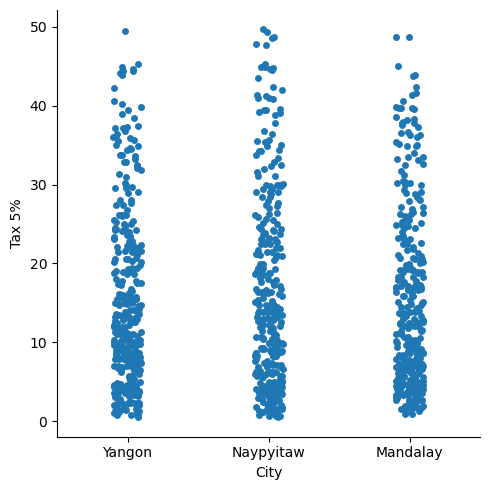

In [416]:
sns.catplot(data=df,x='City',y='Tax 5%')
plt.show()

**Above catplot shows daywise tax collection of the cities, Yangon has the highest tax collection.**

In [417]:
# What is the overall gross income for each date?

gross_income_date = df.groupby('Date')['gross income'].sum()
gross_income_date

Date
01-01-2019    225.9610
01-02-2019     92.6430
01-03-2019     98.9585
01-04-2019     77.3185
01-05-2019    168.4135
                ...   
3/26/2019      93.4530
3/27/2019     138.2295
3/28/2019     106.1620
3/29/2019     191.5830
3/30/2019     213.6695
Name: gross income, Length: 89, dtype: float64

**Customer analysis**

In [418]:
#What is the total revenue generated by each customer type?

total_revenue = df.groupby('Customer type')['Total'].sum()
total_revenue

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

<Axes: xlabel='Customer type', ylabel='Total'>

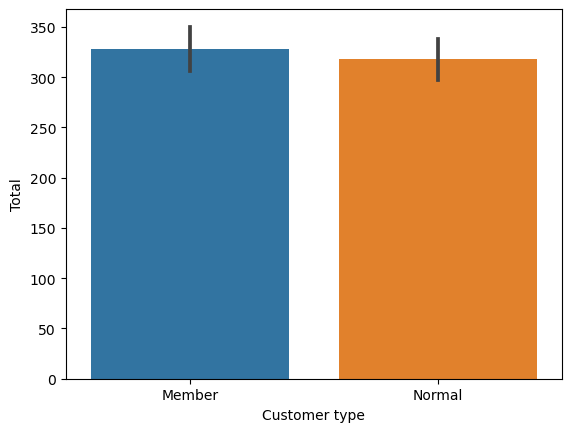

In [419]:
sns.barplot(data = df,x='Customer type', y='Total')


**Above barplot reflects revenue generation by coustomer type, Customers with memebership have highest revenue generation.**

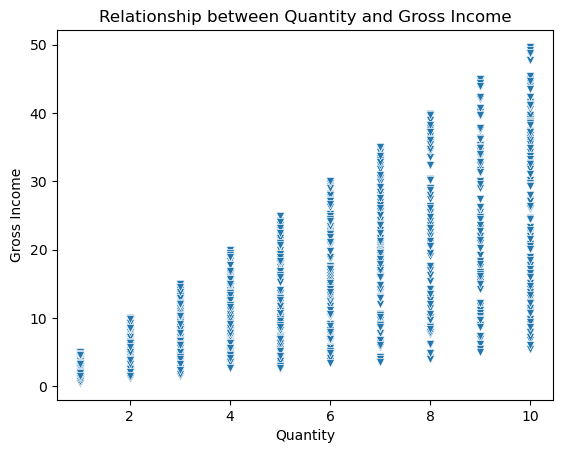

In [420]:
#Relationship between Quantity and Gross Income

sns.scatterplot(x='Quantity', y='gross income', data=df,marker="v")
plt.title('Relationship between Quantity and Gross Income')
plt.xlabel('Quantity')
plt.ylabel('Gross Income')
plt.show()

**Above scatterplot shows relative data of Qunatity and Gross Income. Higher the gross quantity maximum the Gross income.**

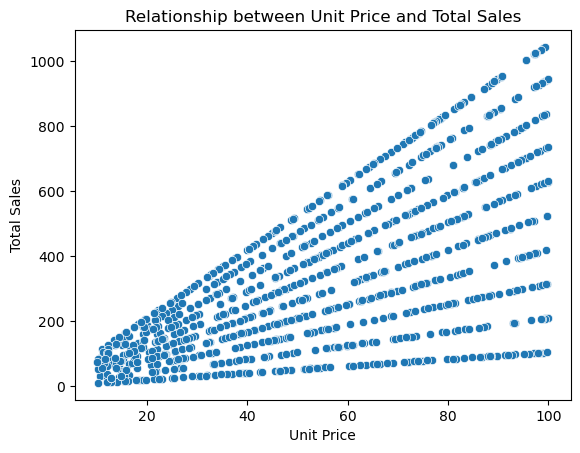

In [421]:
#Relationship between Unit Price and Total Sales

sns.scatterplot(x='Unit price', y='Total',data=df)
plt.title('Relationship between Unit Price and Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.show()

**Above scatterplot repersents the relative data of Unit Price and total sales. Increase in Unit price leads to increase in Total Sales.**

# Inference from the Analysis

* Total Customers = 1000
* Total Females = 501
* Total Males = 499
* Min Rating = 4
* Max Rating = 10
* Average Rating = 6.97
* Best Average Rating in Food & Beverages
* Max Average Gross Income in Home & Lifestyle
* Min Average Gross Income in Fashion Accessories
* Max Average total bill in Home and lifestyle
* Min Average total bill in Fashion Accessories
* Maximum People pays through e-wallet
* Maximum people comes from Yangon City
* Max Average Sales of Fashion Accessories is from Females
* Max Average Sales of Health & Beauty is from Males

# Linear Regression Algorithm

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [423]:
# Assuming 'Total' is the target variable want to predict
X = df.drop('Total', axis=1)  # Features
y = df['Total']  # Target variable

In [424]:
X

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Date,Payment,cogs,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,01-05-2019,Ewallet,522.83,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,03-08-2019,Cash,76.40,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,03-03-2019,Credit card,324.31,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,Ewallet,465.76,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,02-08-2019,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,Ewallet,40.35,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,03-02-2019,Ewallet,973.80,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,02-09-2019,Cash,31.84,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,Cash,65.82,3.2910,4.1


In [425]:
y

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64

In [426]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

In [427]:
X

,Unit price,Quantity,Tax 5%,cogs,gross income,Rating,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,...,Date_3/24/2019,Date_3/25/2019,Date_3/26/2019,Date_3/27/2019,Date_3/28/2019,Date_3/29/2019,Date_3/30/2019,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,522.83,26.1415,9.1,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,15.28,5,3.8200,76.40,3.8200,9.6,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,46.33,7,16.2155,324.31,16.2155,7.4,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,58.22,8,23.2880,465.76,23.2880,8.4,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
4,86.31,7,30.2085,604.17,30.2085,5.3,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,40.35,2.0175,6.2,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
996,97.38,10,48.6900,973.80,48.6900,4.4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
997,31.84,1,1.5920,31.84,1.5920,7.7,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
998,65.82,1,3.2910,65.82,3.2910,4.1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [428]:
# Split dataset into training set and test set
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [429]:
print(len(X_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

700
300
700
300


In [430]:
# Predict on test dataset
y_pred = model.predict(x_test)

In [431]:
y_pred

array([ 523.971 ,  616.98  ,  408.7335,  135.3555,   45.927 ,  618.975 ,
        127.827 ,  731.6925,  450.1035,  138.1275,  422.73  ,  463.428 ,
        212.7825,  252.252 ,  290.0835,  331.128 ,  587.664 ,  216.846 ,
        757.365 ,  185.094 ,  416.178 ,  166.236 ,  128.016 ,  125.706 ,
        247.8735,  195.594 ,  742.2975,   30.996 ,  145.5825,   56.469 ,
         75.5475,  609.    ,   96.1905,  432.768 ,  193.011 ,  174.3   ,
        667.38  ,  198.639 ,  193.074 ,  192.843 ,  214.746 ,  922.635 ,
         74.7075,  180.873 ,   93.0405,  400.764 ,  221.886 ,   68.2395,
        343.224 ,  281.169 ,  430.71  ,  101.64  ,   69.09  ,  269.934 ,
        181.44  ,  494.1825,  461.5275,   60.816 ,  456.288 ,  222.138 ,
        121.128 ,   33.936 ,   84.756 ,  942.4485,  381.3915,  510.615 ,
        370.125 ,  760.452 ,  939.54  ,  118.251 ,  391.419 ,  127.26  ,
        293.139 ,   89.0715,   65.604 ,  697.368 ,  764.19  ,  253.008 ,
         76.755 ,  745.836 ,  305.55  ,   70.287 , 

In [432]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.912069565888648e-26


**Ridge & Lasso**

In [433]:
from sklearn.linear_model import Ridge, Lasso

In [434]:
rd = Ridge()

rd.fit(X_train, y_train)

rd.score(x_test,y_test)

0.9999999999999902

In [435]:
ls = Lasso()

ls.fit(X_train, y_train)

ls.score(x_test,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.163e+03, tolerance: 4.061e+03
  model = cd_fast.enet_coordinate_descent(


0.9999999996722897

In [436]:
#lets find the categorialfeatures
list_1=list(df.columns)

In [437]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [438]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [439]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [440]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,2,0,0,3,74.69,7,26.1415,548.9715,4,2,522.83,26.1415,9.1
1,1,1,0,0,15.28,5,3.8200,80.2200,31,0,76.40,3.8200,9.6
2,2,1,1,4,46.33,7,16.2155,340.5255,26,1,324.31,16.2155,7.4
3,2,0,1,3,58.22,8,23.2880,489.0480,50,2,465.76,23.2880,8.4
4,2,1,1,5,86.31,7,30.2085,634.3785,19,2,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,3,40.35,1,2.0175,42.3675,52,2,40.35,2.0175,6.2
996,0,1,0,4,97.38,10,48.6900,1022.4900,25,2,973.80,48.6900,4.4
997,2,0,1,2,31.84,1,1.5920,33.4320,20,0,31.84,1.5920,7.7
998,2,1,1,4,65.82,1,3.2910,69.1110,64,0,65.82,3.2910,4.1


# Decision Tree 

In [441]:
y=df['Gender'] # Target value
x=df.drop('Gender',axis=1)

In [442]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [443]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [444]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [445]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.53      0.52      0.53       100
           1       0.53      0.54      0.53       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

Confusion Matrix:
 [[52 48]
 [46 54]]
Training Score:
 67.0


**Random Forest**

In [446]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [447]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51       100
           1       0.52      0.54      0.53       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Confusion Matrix:
 [[50 50]
 [46 54]]
Training Score:
 100.0
